In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv


In [2]:
df = pd.read_csv("/kaggle/input/fatscarbsfooddatabase/Fat-Cabs-Foods-raw.csv")

# **Data Visualization**

In [3]:
df=df.iloc[:,1:]
df.head()

,name,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,...,FA_20:3_n-3,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9
0,Milk 2% Fat,29.23,89.22g,3.5564g,3.2777g,0g,0g,0g,0g,3.2777g,...,0.0022g,0.0103g,0g,0g,0g,0g,0g,0g,0g,0g
1,Mixed Cheese,212.19,41.6g,6.8188g,4.9411g,0g,0g,0g,0g,4.9411g,...,0.0323g,0.1401g,0g,0g,0g,0g,0.0121g,0.0187g,0g,0g
2,Plain Yogurt,42.29,82.39g,4.5203g,2.8995g,0g,0g,0g,0g,2.8995g,...,0g,0.0857g,0g,0.0109g,0g,0g,0g,0.049g,0.0039g,0g
3,Buttermilk,25.55,90.32g,4.9445g,4.8085g,0g,0g,0g,0g,4.8085g,...,0g,0.0036g,0g,0g,0g,0g,0g,0g,0g,0g
4,Apple,39.21,85.21g,9.7032g,8.9358g,5.6916g,2.0531g,1.191g,0g,0g,...,0g,0g,0g,0g,0g,0g,0g,0g,0g,0g


In [4]:
for a in df.columns[2:]:
    df[a] = [float(a.split("g")[0]) for a in df[a]]

In [5]:
df.info()
df.describe()
df.columns
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35 non-null     object 
 1   calories                     35 non-null     float64
 2   water                        35 non-null     float64
 3   carborhyrate_total           35 non-null     float64
 4   free_saccharides_total       35 non-null     float64
 5   fructose_free                35 non-null     float64
 6   glucose_free                 35 non-null     float64
 7   sucrose_free                 35 non-null     float64
 8   maltose_free                 35 non-null     float64
 9   lactose_free                 35 non-null     float64
 10  melibiose_free               35 non-null     float64
 11  kestose_free                 35 non-null     float64
 12  raffinose_free               35 non-null     float64
 13  isomaltotriose_free   

,calories,water,carborhyrate_total,free_saccharides_total,fructose_free,glucose_free,sucrose_free,maltose_free,lactose_free,melibiose_free,...,FA_20:3_n-3,FA_20:4_n-6,FA_20:5_n-3,FA_22:0,FA_22:1_n-9,FA_22:4_n-6,FA_22:5_n-3,FA_22:6_n-3,FA 24:0,FA_24:1_n-9
calories,1.000000,-0.922037,0.614260,0.434124,-0.092873,-0.007242,0.568329,0.397045,0.076542,NaN,...,0.122421,0.077350,0.056953,0.684751,NaN,-0.070336,0.096939,0.142720,0.679717,0.069022
water,-0.922037,1.000000,-0.549258,-0.370570,0.184616,0.088644,-0.543207,-0.446452,0.048431,NaN,...,-0.158712,-0.173354,-0.082711,-0.524655,NaN,-0.049824,-0.118141,-0.172096,-0.522353,-0.091123
carborhyrate_total,0.614260,-0.549258,1.000000,0.694540,0.165847,0.304293,0.680612,0.663468,0.004585,NaN,...,-0.180766,-0.306379,-0.136579,0.153867,NaN,-0.212392,-0.137411,-0.006375,0.148273,-0.128062
free_saccharides_total,0.434124,-0.370570,0.694540,1.000000,0.406286,0.568994,0.866036,0.831592,0.172304,NaN,...,-0.100222,-0.190562,-0.086929,0.146769,NaN,-0.191307,-0.073482,0.068372,0.147679,-0.075530
fructose_free,-0.092873,0.184616,0.165847,0.406286,1.000000,0.918430,-0.019775,-0.054867,-0.106177,NaN,...,-0.079776,-0.177983,-0.056453,-0.062543,NaN,-0.124238,-0.061829,-0.064901,-0.062773,-0.049050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FA_22:4_n-6,-0.070336,-0.049824,-0.212392,-0.191307,-0.124238,-0.141802,-0.130607,-0.083769,-0.161257,NaN,...,0.409385,0.729965,0.331334,-0.078428,NaN,1.000000,0.352843,0.315876,-0.073864,0.342325
FA_22:5_n-3,0.096939,-0.118141,-0.137411,-0.073482,-0.061829,-0.069025,-0.048728,-0.033955,-0.029786,NaN,...,0.977515,0.344643,0.994053,-0.009098,NaN,0.352843,1.000000,0.975735,-0.008596,0.993103
FA_22:6_n-3,0.142720,-0.172096,-0.006375,0.068372,-0.064901,-0.037542,0.101082,0.139060,-0.033688,NaN,...,0.951285,0.282174,0.980461,-0.030662,NaN,0.315876,0.975735,1.000000,-0.030670,0.982382
FA 24:0,0.679717,-0.522353,0.148273,0.147679,-0.062773,-0.062799,0.333419,-0.003290,-0.074665,NaN,...,-0.047926,-0.116477,-0.030884,0.999728,NaN,-0.073864,-0.008596,-0.030670,1.000000,-0.026076


In [15]:
df["Carbs_total"]=df["carborhyrate_total"]*4
df["Free_saccharides_total"]=df["free_saccharides_total"]*4
df["Fibres_total"]=df["fibers_total"]*4
df["Fats_total"]=df["fat_total"]*9
df["Saturated_fatty_acids"]=df["saturated_fatty_acids"]*9
df["Monounsaturated_fatty_acids"]=df["monounsaturated_fatty_acids"]*9
df["Fatty_acids_trans"]=df["fatty_acids_total_trans"]*9

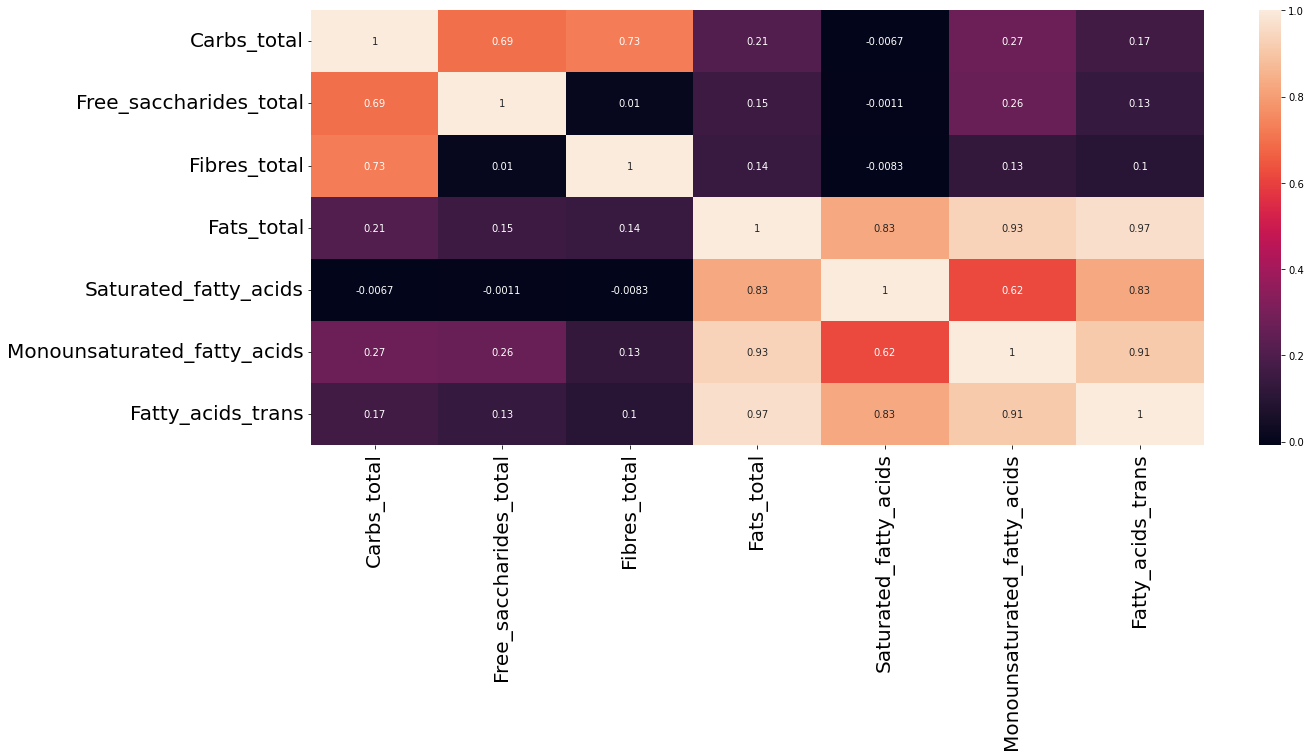

In [48]:
plt.figure(figsize=(20,8))
sns.heatmap(df[["Carbs_total","Free_saccharides_total","Fibres_total","Fats_total","Saturated_fatty_acids","Monounsaturated_fatty_acids","Fatty_acids_trans"]].corr(),annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

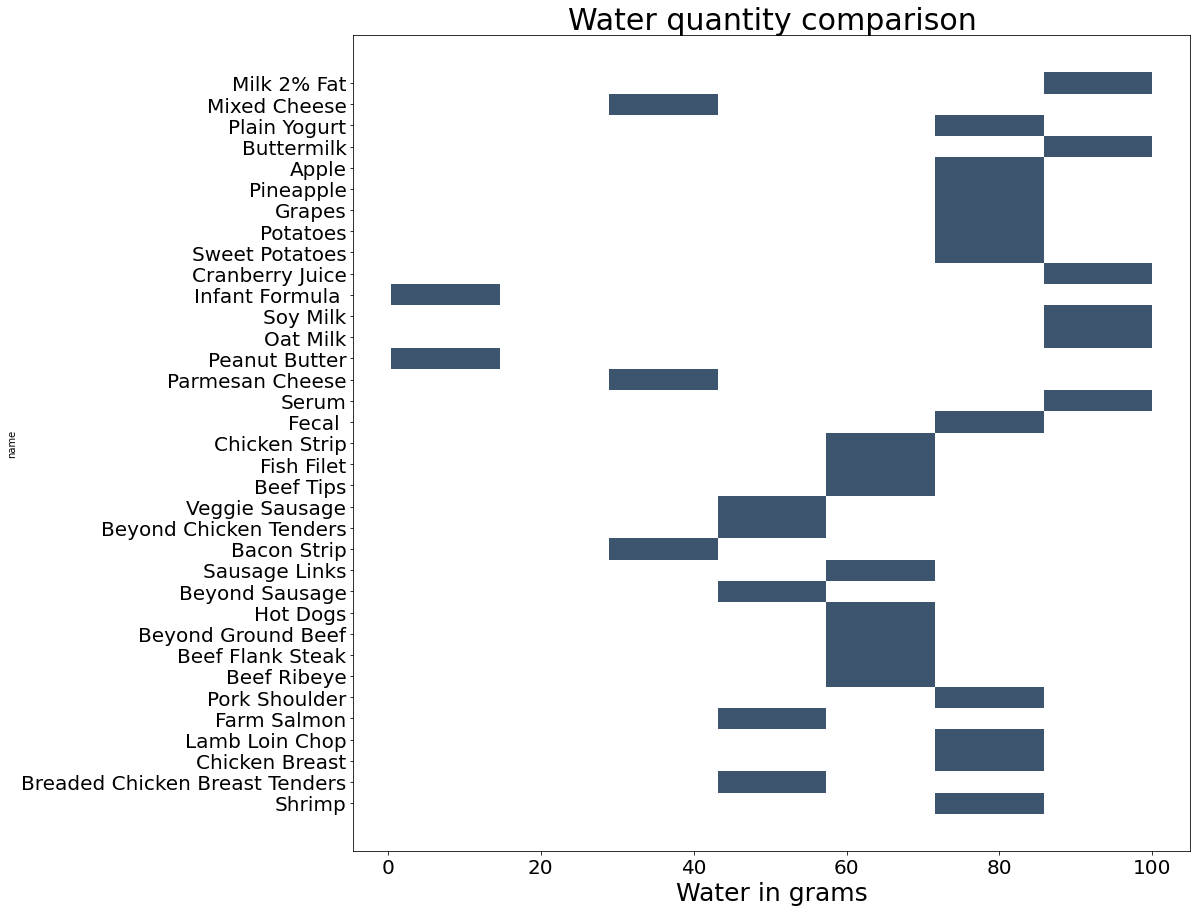

In [6]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="water",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Water in grams",fontsize=25)
plt.title("Water quantity comparison",fontsize=30)
plt.show()

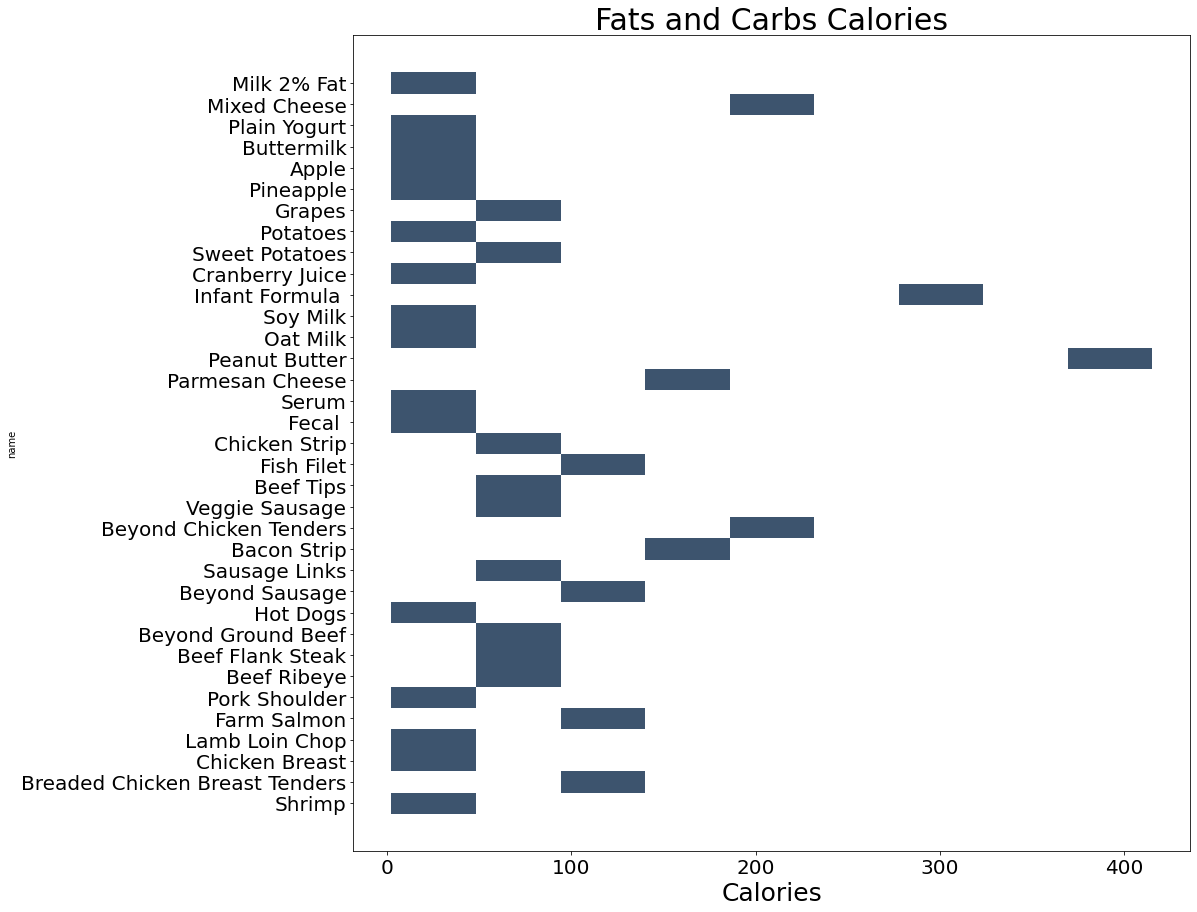

In [7]:
plt.figure(figsize=(15,15))
sns.histplot(data=df,x="calories",y="name")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Calories",fontsize=25)
plt.title("Fats and Carbs Calories",fontsize=30)
plt.show()

#These columns have constant 0 values as seen by the graph, so dropping them out
ctd = df.columns[[10,13,18,20,32,33,35,58,71]]
df.drop(ctd,axis=1,inplace=True)

# **Carbohydrate Analysis**

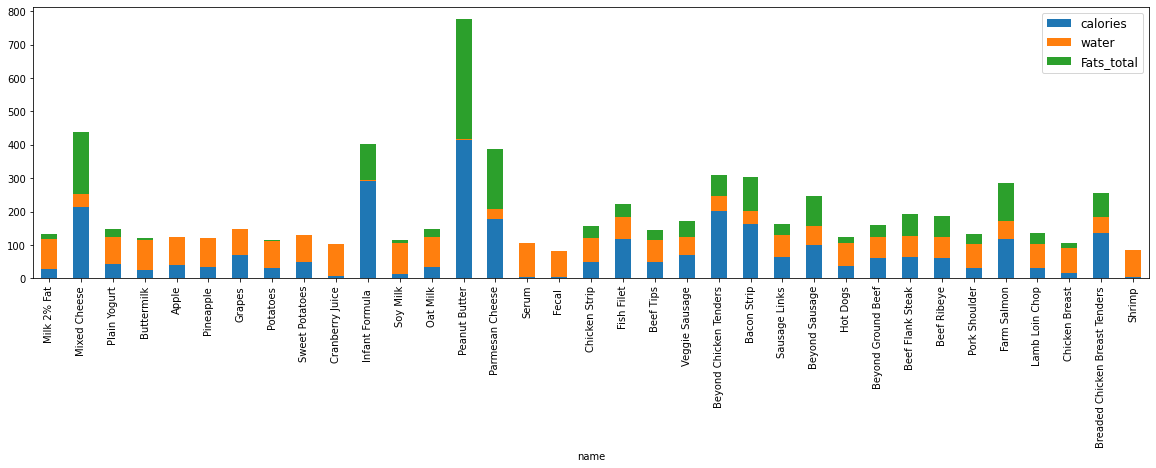

In [55]:
df[["calories","water","Fats_total"]].plot(kind="bar",figsize=(20,5),stacked=True)
plt.legend(prop={"size":12})
plt.show()

Task1: bar plot of carbohydrate_total and free saccharides_total 

https://www.google.com/url?sa=i&url=https%3A%2F%2Fsharkcoder.com%2Fdata-visualization%2Fmpl-double-bar&psig=AOvVaw1CGw-TC5Dr202lq0JHgivn&ust=1668673374279000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCNCL6e-isvsCFQAAAAAdAAAAABAJ

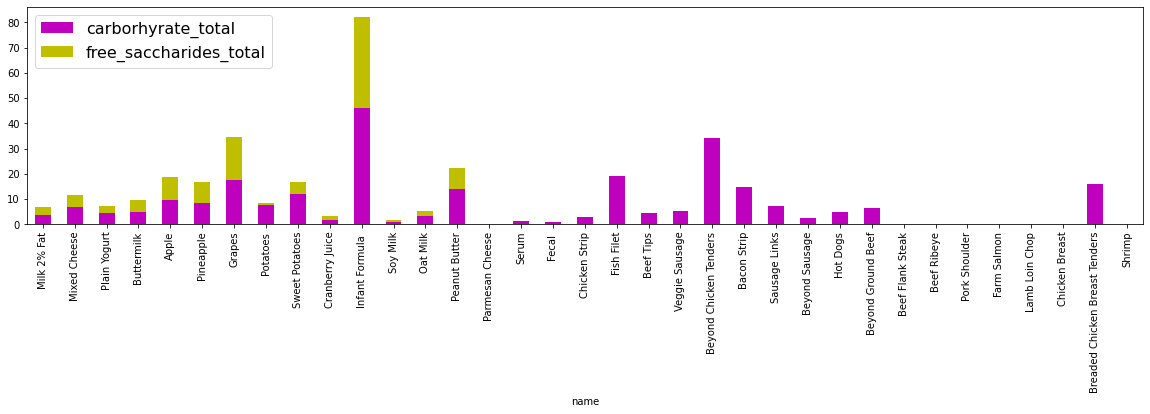

In [76]:
df.index=df.name
df[["carborhyrate_total","free_saccharides_total"]].plot(kind="bar",figsize=(20,4),color=["m","y"],stacked=True)
plt.legend(loc=2,prop={"size":16})
plt.show()

Task 2: stack plot of "fructose_free', 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'kestose_free',
       'raffinose_free', 'kestotetraose_free', 'ketopentaose_free',
       'maltopentaose_free', 'maltotetraose_free', 'stachyose_free',
       'maltohexaose_free', 'glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm'
       
    range from highest to lowest example below
    please mention the variable name on the basis of which you want to sort the table

https://cloud.google.com/static/looker/docs/images/new-dashboard-example-2206.png

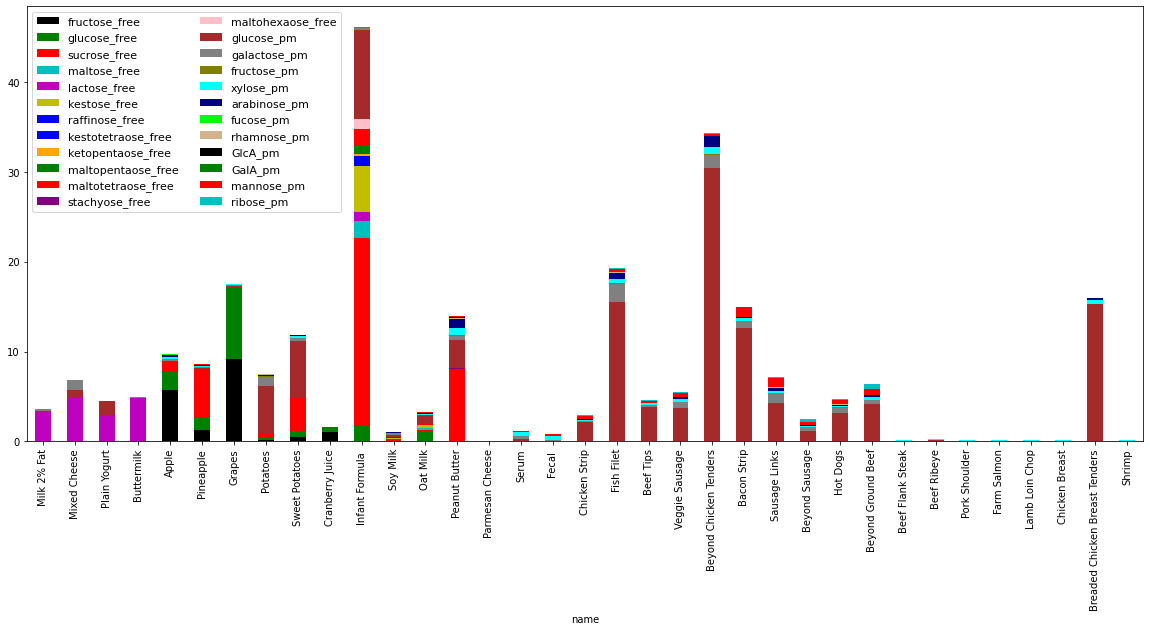

In [63]:
df[["fructose_free", 'glucose_free',
       'sucrose_free', 'maltose_free', 'lactose_free', 'kestose_free',
       'raffinose_free', 'kestotetraose_free', 'ketopentaose_free',
       'maltopentaose_free', 'maltotetraose_free', 'stachyose_free',
       'maltohexaose_free', 'glucose_pm', 'galactose_pm',
       'fructose_pm', 'xylose_pm', 'arabinose_pm', 'fucose_pm', 'rhamnose_pm',
       'GlcA_pm', 'GalA_pm', 'mannose_pm', 'ribose_pm']].plot(kind="bar",stacked=True,figsize=(20,8),
                                                    color=["k","g","r","c","m","y","b","blue","orange","green","red",
                                                   "purple","pink","brown","gray","olive","cyan","navy","lime","tan"])
plt.legend(loc=2,prop={"size":11},ncol=2)
plt.show()

# **Overall Macronutrient Analysis**

Task1: group food based on catergoies 
Grouping the data into categories can give us the total count of all metrics and thus we can analyse the categories.
Food group = Fruit & Vegetables, Cereals & Grains, Dariy Products,  Nuts & Seeds, Meat, Seafood, Fish, 

In [82]:
df["food_group"]=["Dairy","Dairy","Dairy","Dairy","Fruit",
                  "Fruit","Fruit","Vegetables","Vegetables","Fruit",
                 "Dairy","Dairy","Vegetables","Protein",
                 "Dairy","Protein","Protein","Dairy","Dairy",
                 "Dairy","Vegetables","Dairy","Protein",
                 "Dairy","Dairy","Dairy","Dairy",
                 "Dairy","Dairy","Dairy","Dairy",
                  "Dairy","Dairy","Dairy","Dairy"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


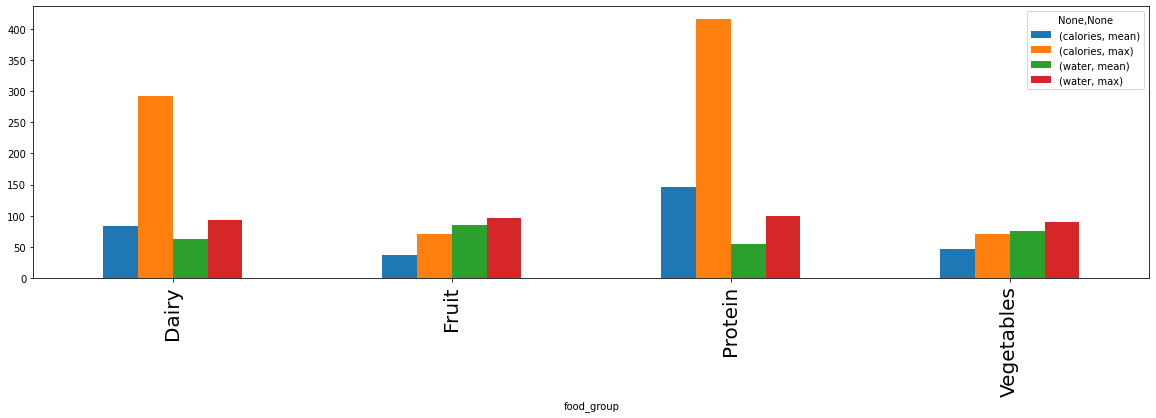

In [83]:
df.groupby("food_group")["calories","water"].agg(["mean","max"]).plot(kind="bar",figsize=(20,5))
plt.xticks(fontsize=20)
plt.show()

Task2: create Ternary plot of group foods base on proteins, fats, carbs

examples https://unidentifiedsignalsource.wordpress.com/2019/04/26/macronutrient-data-visualization/